<a href="https://colab.research.google.com/github/lilylu0105/111-1-econDV/blob/main/Week3_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
googlesheets4::gs4_deauth()
googlesheets4::read_sheet(
  "https://docs.google.com/spreadsheets/d/1lkts4hLkrAFAobONFXiEjgDnuUmXKci6YF--vg1pC1s/edit?usp=sharing",
  sheet="data 3"
) -> data3

✔ Reading from Exercise Data.

✔ Range ''data 3''.



In [21]:
library(dplyr)
data3 |>
  group_by(Characteristic) |>
  summarise(
    maxMisery = max(`Total Effect`)
  ) |>
  ungroup() -> data3max

print(data3max)

# A tibble: 4 × 2
  Characteristic maxMisery
           <dbl>     <dbl>
1              1     0.458
2              2     0.59 
3              3     0.334
4              4     0.726


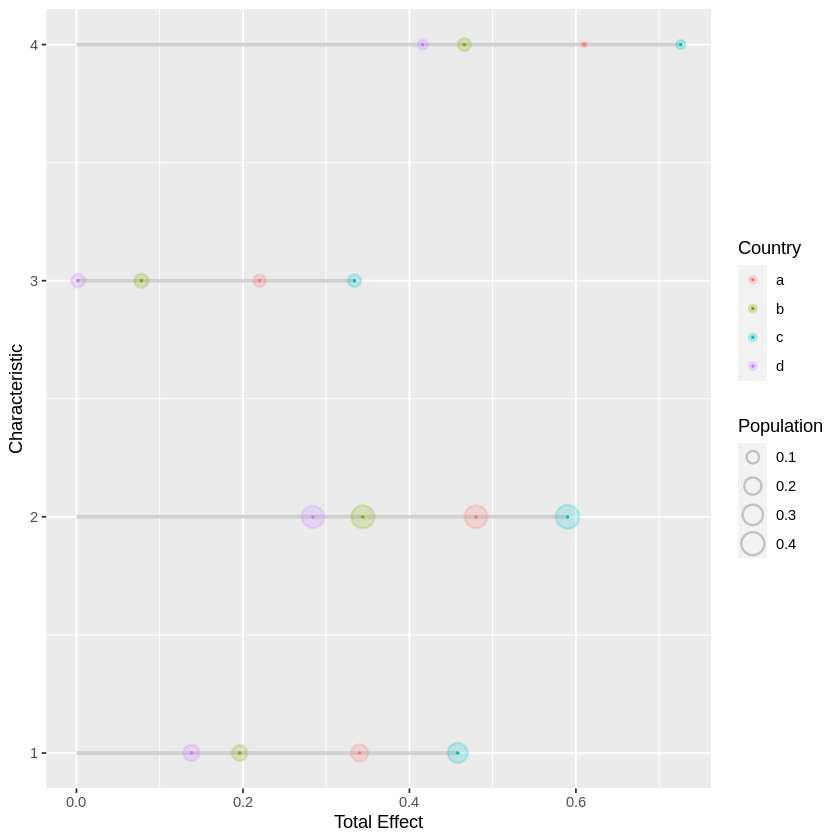

In [29]:
library(ggplot2)
ggplot(
  data=data3,
  mapping=aes(
    x=`Total Effect`,
    y=Characteristic
  )
)+
  geom_segment(
    data=data3max,
    aes(
      x=0,
      y=Characteristic,
      xend=maxMisery,
      yend=Characteristic
    ),
    size = 1,
    alpha=0.7,
    color="grey"
  )+
 geom_point(
  aes(
    color=Country
    ),
    size=0.3
    )+
 geom_point(
  aes(
    color=Country,
    size=Population,
    fill=Country,
    ),
    shape=21,
    alpha=0.2,
    stroke=1
    )


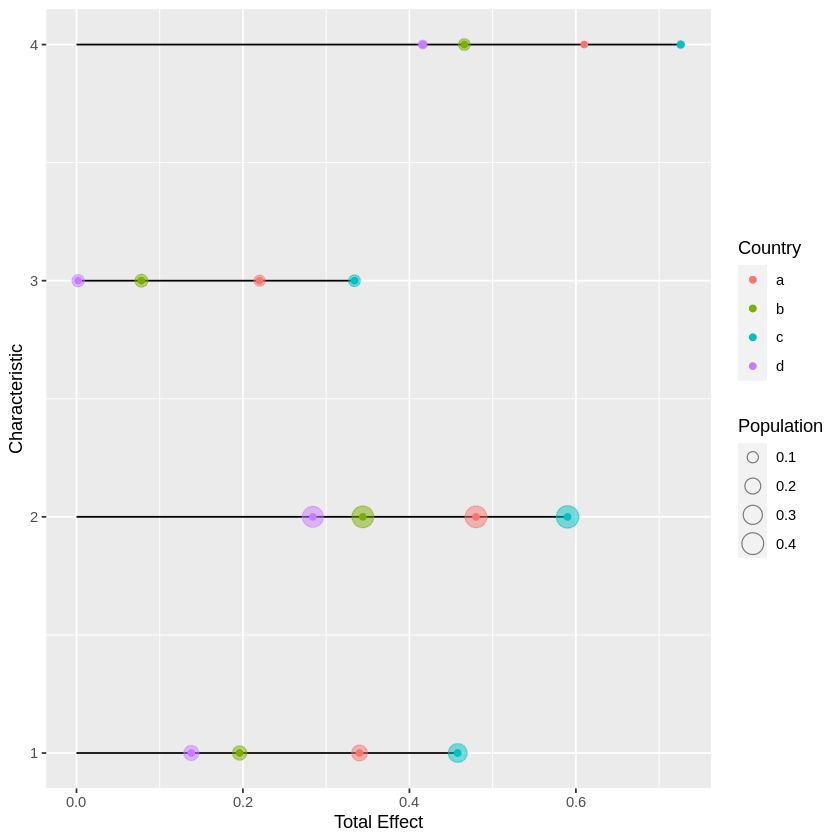

In [30]:
library(ggplot2)
library(dplyr)
ggplot(data=data3,
mapping=aes(x=`Total Effect`, y=Characteristic))+
geom_segment(
  data = {
    data3 |>
    group_by(Characteristic) |>
    summarise(
      maxMisery=max(`Total Effect`)
    )
  },
  mapping=aes(
    x=0, xend=maxMisery,
    y=Characteristic, yend=Characteristic
  )
)+
geom_point(
  shape=21,
  alpha=0.5,
  mapping=aes(
    color=Country,
    fill=Country,
    size=Population
  )
) +
geom_point(
  #shape=20,
  #size=1,
  mapping=aes(
    color=Country
  )
) -> gg0
gg0